In [1]:
## USER

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sagemaker import get_execution_role
import sagemaker.amazon.common as smac

In [3]:
role = get_execution_role()
bucket = 'dean690-dataset'
data_key = 'table.Rating_all.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
rating_role = pd.read_csv(data_path, low_memory = False)
rating_role=rating_role.drop(rating_role.columns[0], axis=1)
rating_role=rating_role.sort_values(by='total_rating', ascending=False, ignore_index=True)

Couldn't call 'get_role' to get Role ARN from role name AmazonSageMaker-ExecutionRole-20210312T142701 to get Role path.
Assuming role was created in SageMaker AWS console, as the name contains `AmazonSageMaker-ExecutionRole`. Defaulting to Role ARN with service-role in path. If this Role ARN is incorrect, please add IAM read permissions to your role or supply the Role Arn directly.


# TOTAL SCORE FOR ALL USER

In [4]:
#set index to be first column
rating_role.reset_index(inplace=True)
#set user_order start from 1
rating_role.columns.values[0] = "user_order"
count = 1
for i in range(len(rating_role)):
  rating_role['user_order'][i] = count
  count = count + 1
rating_role

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,user_order,user,disposals_rating,locations_rating,receiving_rating,total_rating,disposal_role,locations_role,receiving_role
0,1,USER44,0.379776,0.000000,0.000000,0.379776,1,0,0
1,2,USER63,0.367952,0.000000,0.000000,0.367952,1,0,0
2,3,USER64,0.334763,0.023166,0.000000,0.357929,1,1,1
3,4,USER53,0.293655,0.021185,0.000000,0.314840,1,1,0
4,5,USER453,0.000000,0.000000,0.266667,0.266667,0,0,1
...,...,...,...,...,...,...,...,...,...
490,491,USER133,0.000000,0.000000,0.000000,0.000000,1,0,0
491,492,USER459,0.000000,0.000000,0.000000,0.000000,0,0,1
492,493,USER317,0.000000,0.000000,0.000000,0.000000,0,1,0
493,494,USER315,0.000000,0.000000,0.000000,0.000000,0,1,0


(0, 0.4)

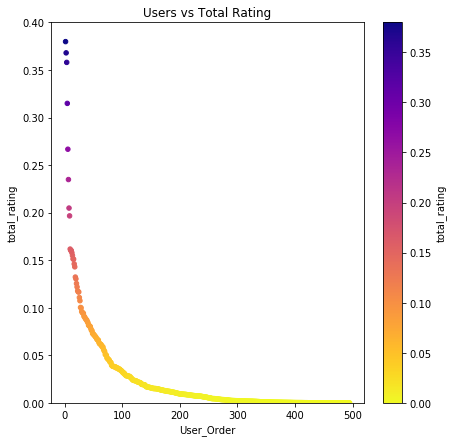

In [6]:
#plt.figure(figsize=(200,200))
fig, ax = plt.subplots()
rating_role.plot(kind = "scatter", x = 'user_order', y ='total_rating', c = 'total_rating', cmap = 'plasma_r', ax=ax)
plt.gcf().set_size_inches((7, 7))  
plt.title("Users vs Total Rating")
plt.xlabel("User_Order")
plt.ylim(0,0.4)

In [15]:
from ipywidgets import interact
import pywedge as pw

In [16]:
data_key = 'table.Rating_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
rating_role = pd.read_csv(data_path, low_memory = False)


#rating_role.sort_values(by='total_rating', ascending=False)
rating_role.columns.values[0] = "user_order"
count = 1
for i in range(len(rating_role)):
  rating_role['user_order'][i] = count
  count = count + 1

rating_role

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,user_order,user,scan_type_#,ret_date_#,disp_doc_#,err_cost_disposals,std_err_cost_disposals,disposals_rating,org_cost_disposals,scan_type_%,...,misclf_fap_#,cre_mthod_#,err_cost_receiving,std_err_cost_receiving,receiving_rating,org_cost_receiving,misclf_fap_%,cre_mthod_%,err_cost_receiving_%,total_rating
0,1,USER44,105.0,1507,249,1135946.311,6.622482,0.379776,1764655.665,0.033302,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.379776
1,2,USER63,1242.5,1594,6,912374.690,5.204929,0.367952,1154820.350,0.445181,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.367952
2,3,USER64,167.5,1321,0,1016052.240,5.862295,0.334763,1386107.310,0.096486,...,0.0,0.0,0.00,-0.109431,0.000000,31188.12,0.0,0.000000,0.000000,0.357929
3,4,USER53,195.5,1538,1786,628189.278,3.403055,0.293655,660450.721,0.096022,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.314840
4,5,USER453,0.0,0,0,0.000,0.000000,0.000000,0.000,0.000000,...,0.0,3039.0,7547970.71,12.930853,0.266667,7547970.71,0.0,1.000000,1.000000,0.266667
5,6,USER37,432.0,1019,107,551575.870,2.917289,0.210337,650603.510,0.313043,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.234780
6,7,USER4,258.5,928,0,584541.480,3.126307,0.204804,954106.460,0.136196,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.204804
7,8,USER5,123.5,845,0,469734.100,2.398372,0.162136,799476.260,0.076141,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.196586
8,9,USER270,0.0,0,0,0.000,0.000000,0.000000,0.000,0.000000,...,0.0,278.0,101226.60,0.065453,0.008781,547830.58,0.0,0.247551,0.184777,0.161692
9,10,USER70,150.5,922,0,452719.056,2.290488,0.160202,1557018.824,0.043826,...,0.0,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.160202


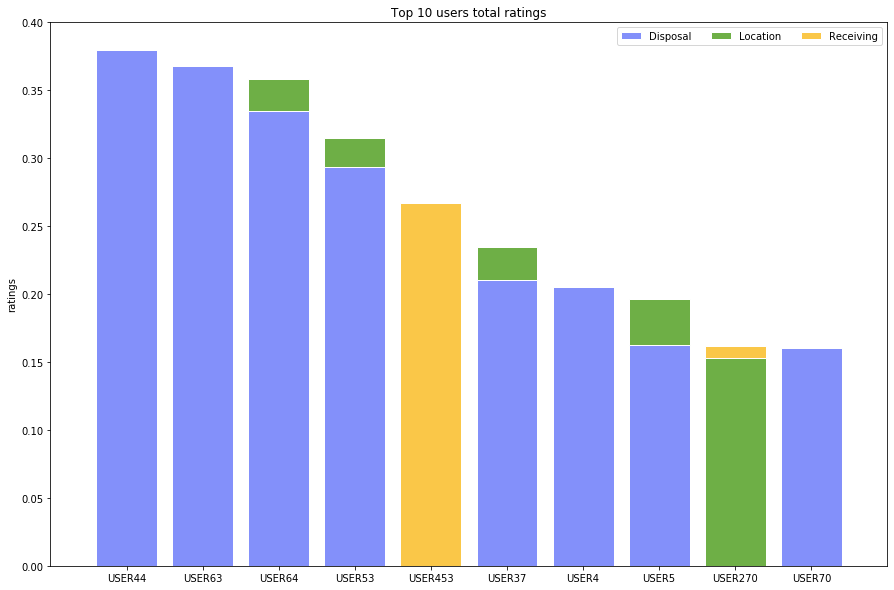

In [17]:
#create stack bar plot for total rating
bars = np.add(rating_role['disposals_rating'], rating_role['locations_rating']).tolist()
#create bottom bar
plt.figure(figsize=(15,10))
plt.bar(rating_role['user'], rating_role['disposals_rating'], color='#8390FA', edgecolor='white')
# Create middle bar
plt.bar(rating_role['user'], rating_role['locations_rating'], bottom=rating_role['disposals_rating'], color='#6EAF46', edgecolor='white')
# Create top bar
plt.bar(rating_role['user'], rating_role['receiving_rating'], bottom=bars, color='#FAC748', edgecolor='white')
plt.ylabel('ratings')
plt.xlim(-1, 10)
plt.ylim(0,0.4)
plt.title("Top 10 users total ratings", loc ='center')
plt.legend(['Disposal', 'Location', 'Receiving'], loc='upper right', ncol = 3)

In [18]:
data_key = 'table.disposals_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
Disposal_role = pd.read_csv(data_path, low_memory = False)

Disposal_role.columns.values[0] = "user_order"
count = 1
for i in range(len(Disposal_role)):
  Disposal_role['user_order'][i] = count
  count = count + 1

Disposal_role

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,user_order,user,scan_type_#,ret_date_#,disp_doc_#,err_cost_disposals,std_err_cost_disposals,disposals_rating,org_cost_disposals,scan_type_%,ret_date_%,disp_doc_%,err_cost_disposals_%
0,1,USER44,105.0,1507,249,1135946.311,6.622482,0.379776,1764655.665,0.033302,0.477958,0.078972,0.643721
1,2,USER63,1242.5,1594,6,912374.690,5.204929,0.367952,1154820.350,0.445181,0.571121,0.002150,0.790058
2,3,USER64,167.5,1321,0,1016052.240,5.862295,0.334763,1386107.310,0.096486,0.760945,0.000000,0.733026
3,4,USER53,195.5,1538,1786,628189.278,3.403055,0.293655,660450.721,0.096022,0.755403,0.877210,0.951152
4,5,USER37,432.0,1019,107,551575.870,2.917289,0.210337,650603.510,0.313043,0.738406,0.077536,0.847791
5,6,USER4,258.5,928,0,584541.480,3.126307,0.204804,954106.460,0.136196,0.488936,0.000000,0.612659
6,7,USER5,123.5,845,0,469734.100,2.398372,0.162136,799476.260,0.076141,0.520962,0.000000,0.587552
7,8,USER70,150.5,922,0,452719.056,2.290488,0.160202,1557018.824,0.043826,0.268492,0.000000,0.290760
8,9,USER55,203.0,929,0,412404.729,2.034876,0.151336,739002.540,0.101551,0.464732,0.000000,0.558056
9,10,USER48,214.0,642,0,429852.945,2.145506,0.151044,602691.845,0.154290,0.462870,0.000000,0.713222


Text(0.5, 1.0, 'Disposal - Top 10 Users vs Disposal Rating')

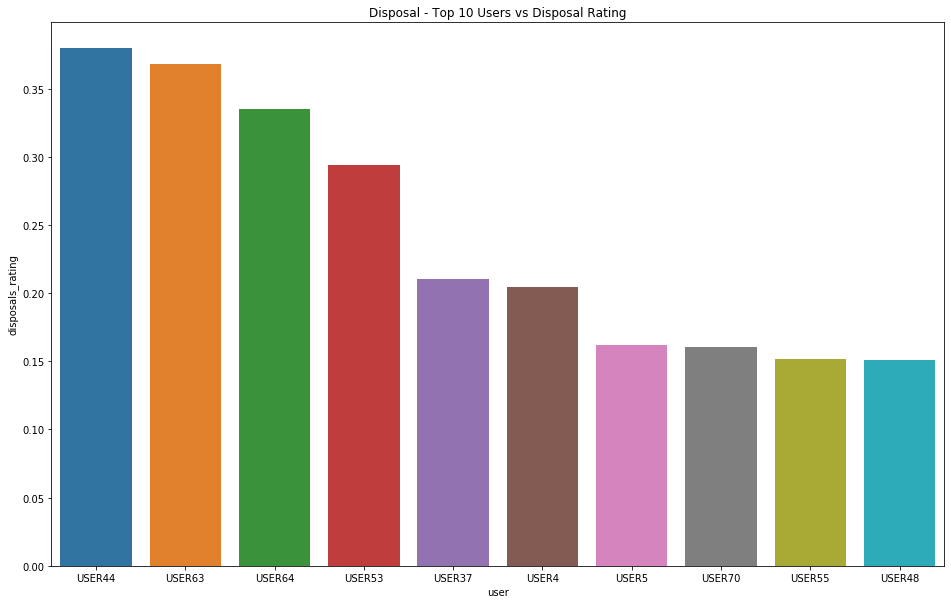

In [20]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="disposals_rating", data=Disposal_role)
plt.title("Disposal - Top 10 Users vs Disposal Rating")

Text(0.5, 1.0, 'Disposal - Top 10 Users vs Error Cost')

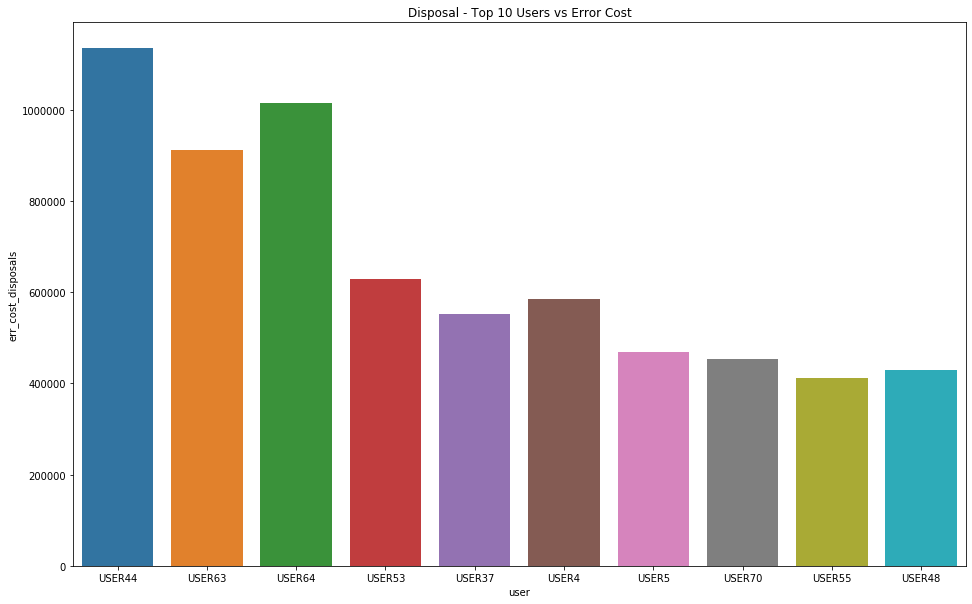

In [21]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="err_cost_disposals", data=Disposal_role)
plt.title("Disposal - Top 10 Users vs Error Cost")

Text(0.5, 1.0, 'Disposal - Top 10 Users vs Error Scan_Type Actions')

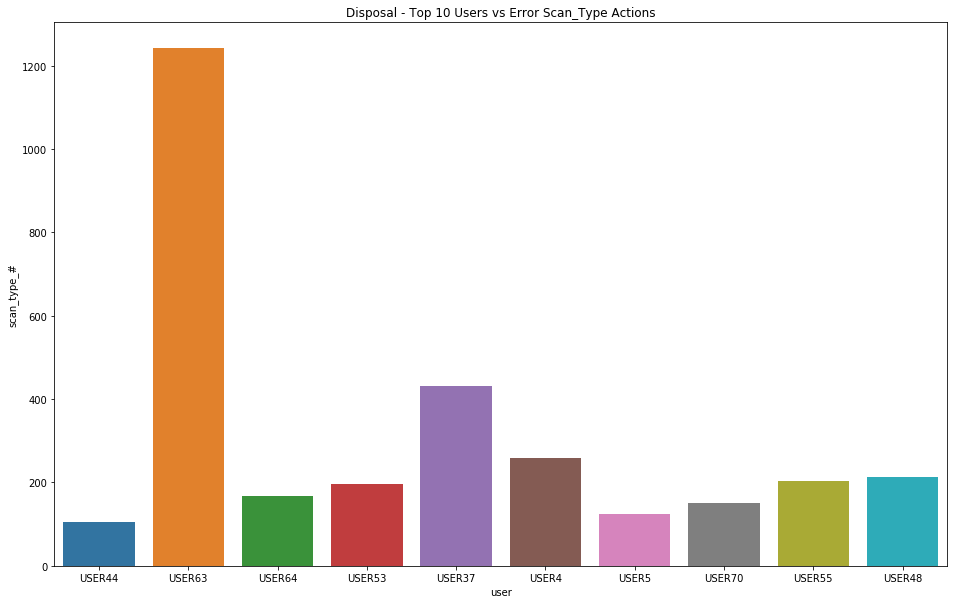

In [22]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="scan_type_#", data=Disposal_role)
plt.title("Disposal - Top 10 Users vs Error Scan_Type Actions")

Text(0.5, 1.0, 'Disposal - Top 10 Users vs Error Retirement Date Actions')

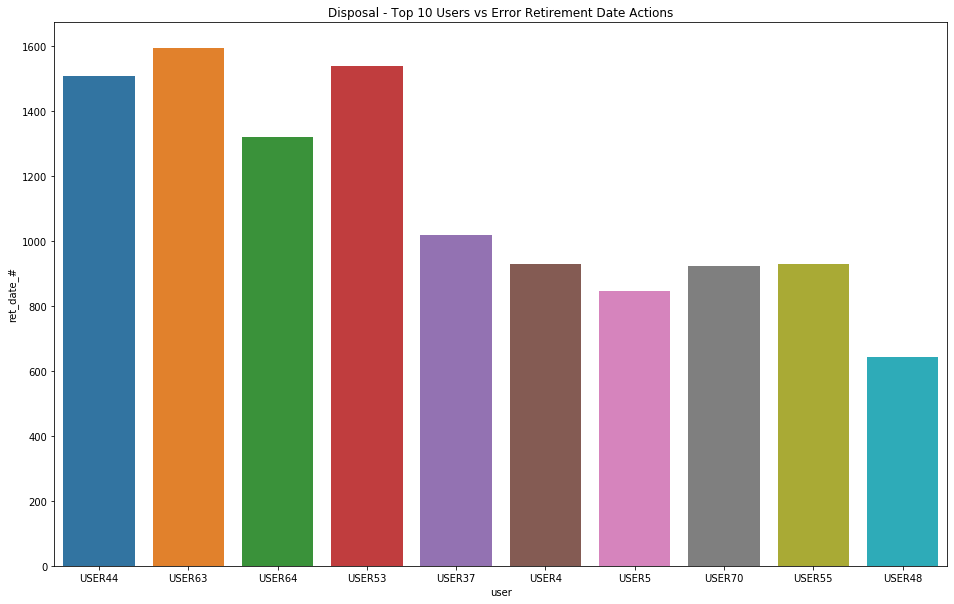

In [23]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="ret_date_#", data=Disposal_role)
plt.title("Disposal - Top 10 Users vs Error Retirement Date Actions")

Text(0.5, 1.0, 'Disposal - Top 10 Users vs Error Documentation Actions')

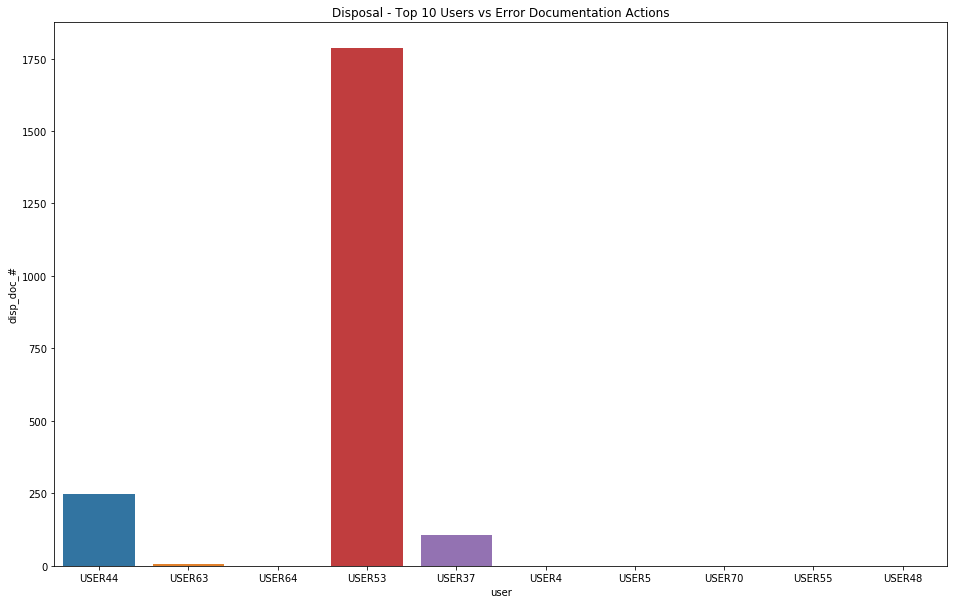

In [24]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="disp_doc_#", data=Disposal_role)
plt.title("Disposal - Top 10 Users vs Error Documentation Actions")

## TOP10 USER LOCATION

In [26]:
data_key = 'table.locations_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
location_role = pd.read_csv(data_path, low_memory = False)

location_role.columns.values[0] = "user_order"
count = 1
for i in range(len(location_role)):
  location_role['user_order'][i] = count
  count = count + 1

location_role

,user_order,user,val_ds584_flag_#,err_cost_locations,std_err_cost_locations,locations_rating,org_cost_locations,val_ds584_flag_%,err_cost_locations_%
0,1,USER270,190,487493.270,9.144131,0.152911,487493.270,1.000000,1.000000
1,2,USER219,647,290365.090,5.250169,0.146084,2631874.970,0.099142,0.110326
2,3,USER72,591,285030.090,5.144784,0.138854,825719.830,0.354742,0.345190
3,4,USER73,433,211982.684,3.701846,0.102595,233334.456,0.894628,0.908493
4,5,USER241,433,181739.980,3.104448,0.094324,747659.820,0.256062,0.243078
5,6,USER3,408,187565.980,3.219532,0.093341,249960.320,0.739130,0.750383
6,7,USER174,363,194060.600,3.347823,0.090481,194060.600,1.000000,1.000000
7,8,USER227,479,108469.660,1.657107,0.079023,188810.820,0.642953,0.574489
8,9,USER119,335,162601.791,2.726403,0.078991,162601.791,1.000000,1.000000
9,10,USER252,347,154286.692,2.562151,0.077953,154286.692,1.000000,1.000000


Text(0.5, 1.0, 'Location - Top 10 Users vs Location Rating')

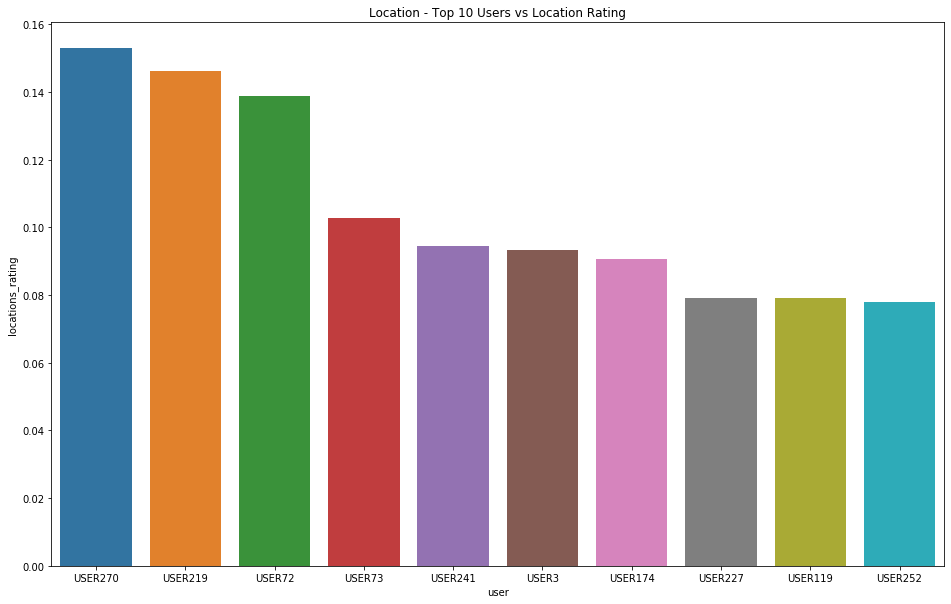

In [27]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="locations_rating", data=location_role)
plt.title("Location - Top 10 Users vs Location Rating")

Text(0.5, 1.0, 'Location - Top 10 Users vs Error Cost')

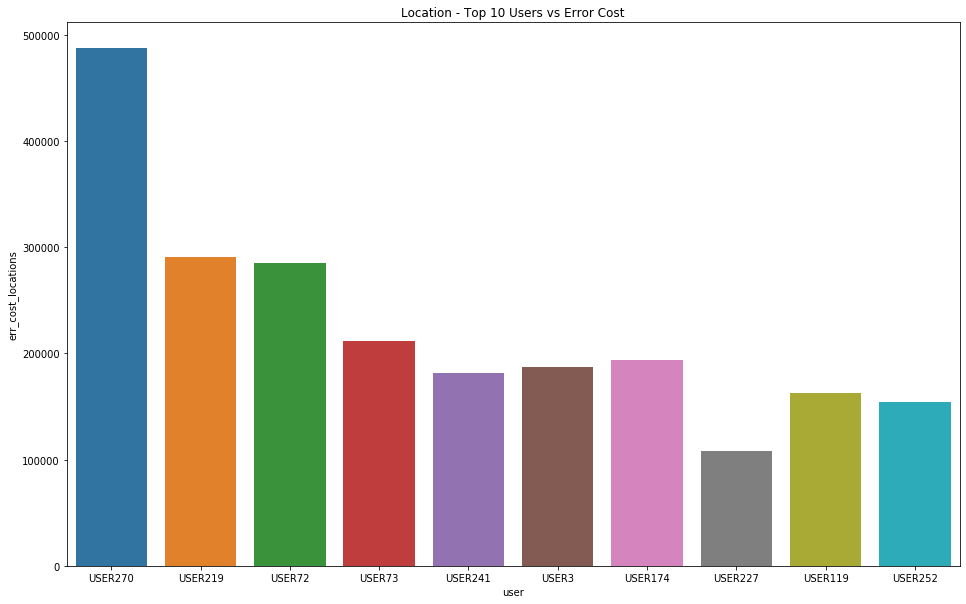

In [28]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="err_cost_locations", data=location_role)
plt.title("Location - Top 10 Users vs Error Cost")

Text(0.5, 1.0, 'Location - Top 10 Users vs Error Validation Actions')

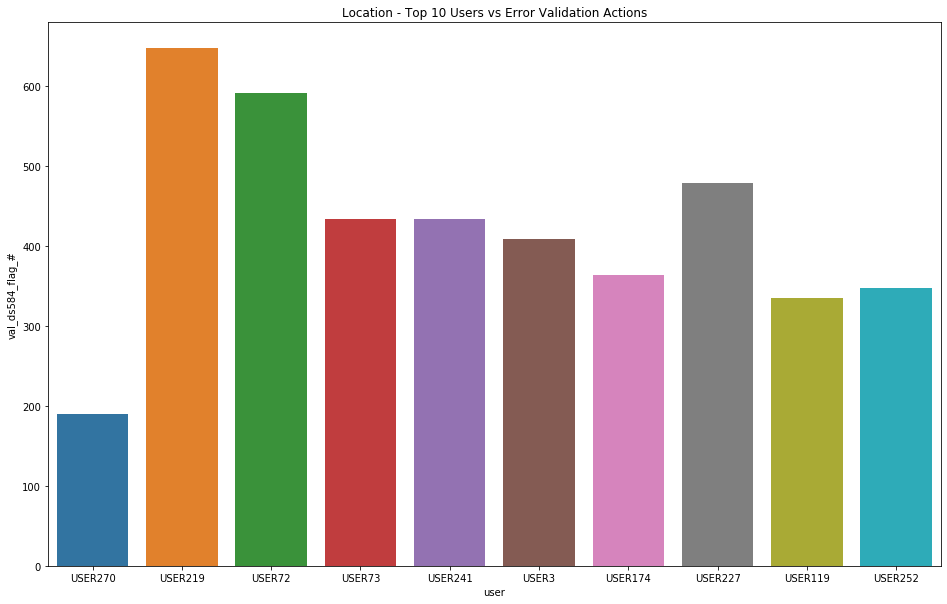

In [29]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="val_ds584_flag_#", data=location_role)
plt.title("Location - Top 10 Users vs Error Validation Actions")

Text(0.5, 1.0, 'Location - Top 10 Users vs Error Validation Action Percentage')

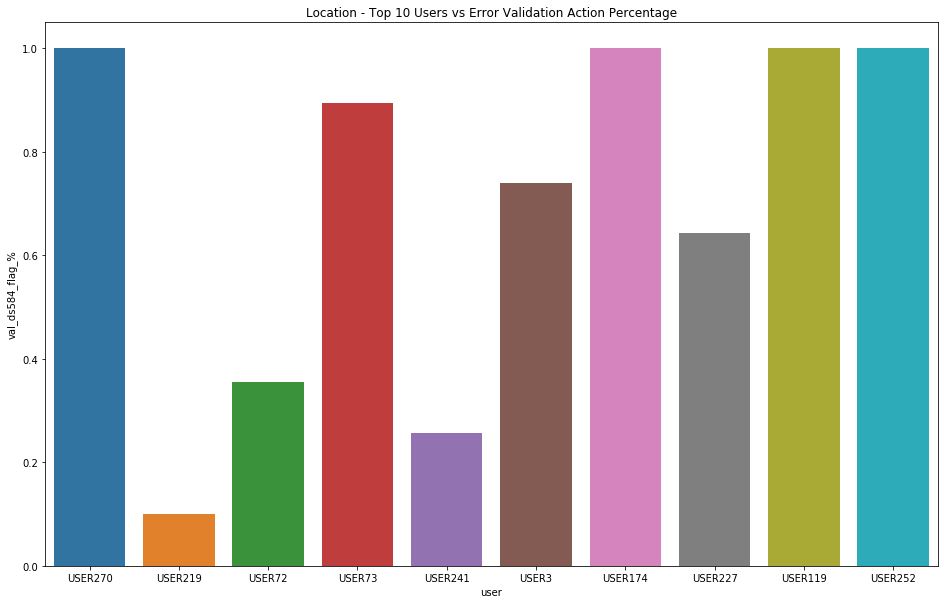

In [30]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="val_ds584_flag_%", data=location_role)
plt.title("Location - Top 10 Users vs Error Validation Action Percentage")

## Top 10 Users_Receiving

In [31]:
data_key = 'table.receiving_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
receiving_role = pd.read_csv(data_path, low_memory = False)

receiving_role.columns.values[0] = "user_order"
count = 1
for i in range(len(receiving_role)):
  receiving_role['user_order'][i] = count
  count = count + 1

receiving_role

,user_order,user,misclf_fap_#,cre_mthod_#,err_cost_receiving,std_err_cost_receiving,receiving_rating,org_cost_receiving,misclf_fap_%,cre_mthod_%,err_cost_receiving_%
0,1,USER453,0,3039,7547970.710,12.930853,0.266667,7547970.710,0.000000,1.000000,1.000000
1,2,USER279,249,37,206313.350,0.247007,0.039612,409818.880,0.335580,0.049865,0.503426
2,3,USER276,58,1013,139596.990,0.131744,0.033686,1060178.194,0.020737,0.362174,0.131673
3,4,USER416,231,0,88428.380,0.043343,0.033267,222220.390,0.619303,0.000000,0.397931
4,5,USER311,186,0,40111.470,-0.040132,0.025962,224414.990,0.267626,0.000000,0.178738
5,6,USER471,156,0,178174.250,0.198392,0.025605,238958.750,0.636735,0.000000,0.745628
6,7,USER449,152,83,44376.792,-0.032763,0.023345,2315108.657,0.035968,0.019640,0.019168
7,8,USER365,145,0,90273.430,0.046530,0.021803,121000.450,0.771277,0.000000,0.746059
8,9,USER351,136,108,28945.420,-0.059423,0.021342,537252.970,0.097631,0.077531,0.053877
9,10,USER101,139,11,93195.000,0.051578,0.021318,93195.000,1.000000,0.079137,1.000000


Text(0.5, 1.0, 'Receiving - Top 10 Users vs Receiving Rating')

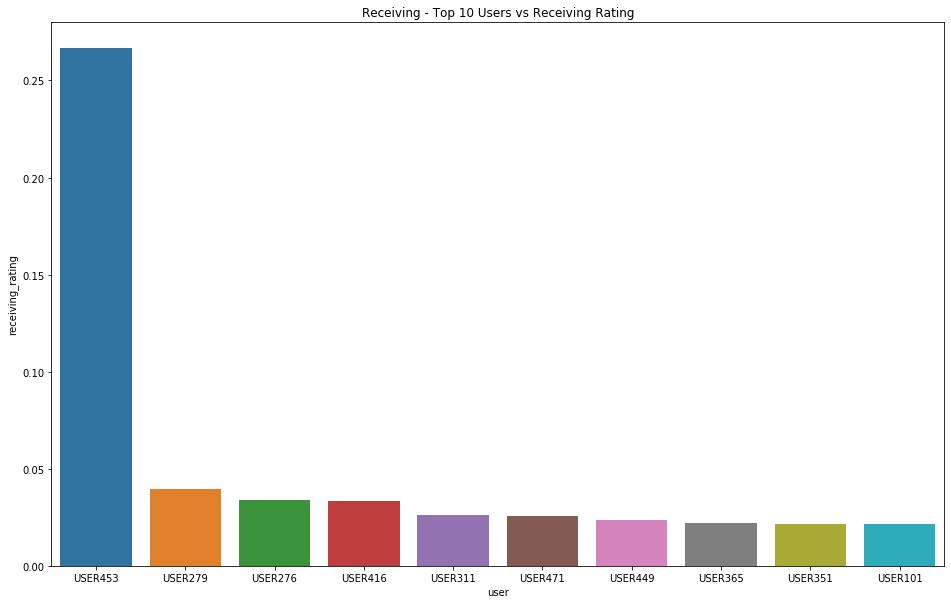

In [32]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="receiving_rating", data=receiving_role)
plt.title("Receiving - Top 10 Users vs Receiving Rating")

Text(0.5, 1.0, 'Receiving - Top 10 Users vs Error Cost')

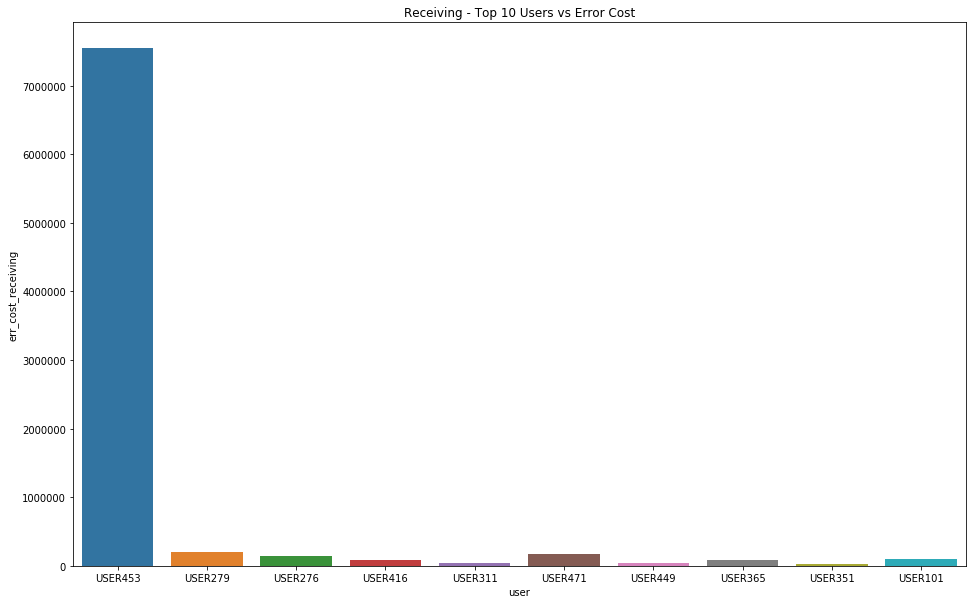

In [33]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="err_cost_receiving", data=receiving_role)
plt.title("Receiving - Top 10 Users vs Error Cost")

Text(0.5, 1.0, 'Receiving - Top 10 Users vs Error Misclassification Actions')

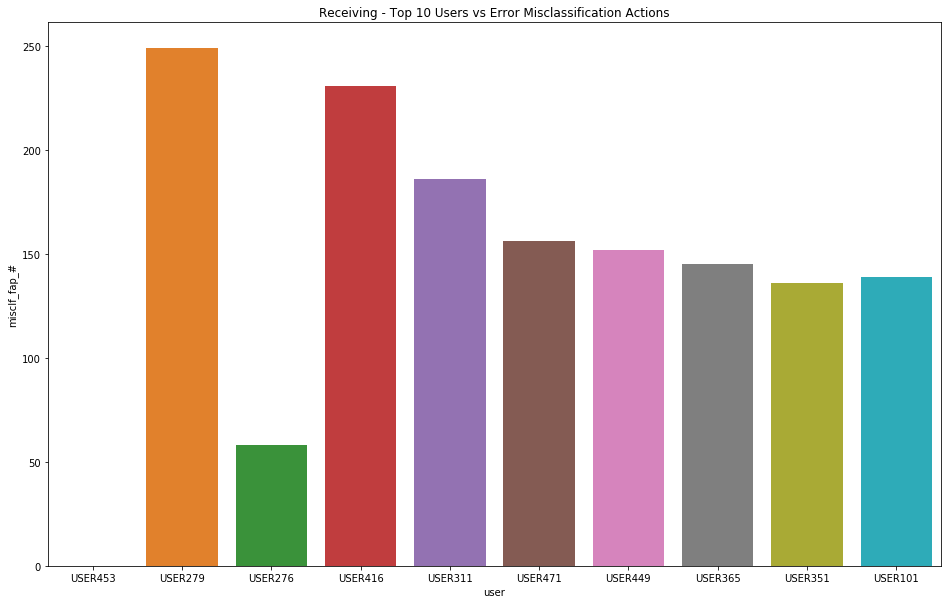

In [34]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="misclf_fap_#", data=receiving_role)
plt.title("Receiving - Top 10 Users vs Error Misclassification Actions")

Text(0.5, 1.0, 'Receiving - Top 10 Users vs Error Creation Method Actions')

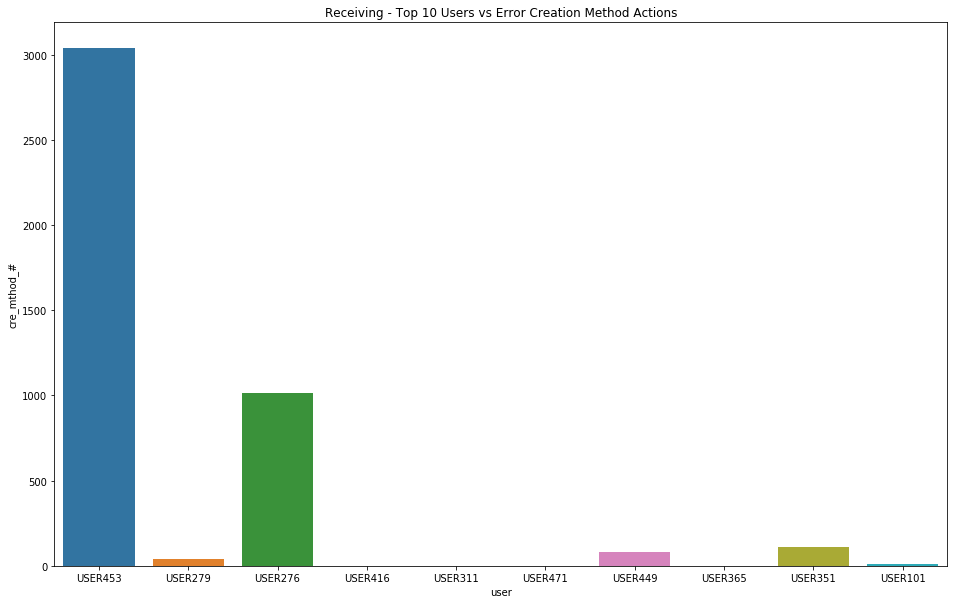

In [35]:
plt.figure(figsize=(16, 10))
sns.barplot(x="user", y="cre_mthod_#", data=receiving_role)
plt.title("Receiving - Top 10 Users vs Error Creation Method Actions")

In [38]:
data_key = 'table.Location_Rating.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
Location_rating = pd.read_csv(data_path, low_memory = False)
Location_rating=Location_rating.drop(Location_rating.columns[0], axis=1)
Location_rating=Location_rating.sort_values(by='total_rating', ascending=False, ignore_index=True)
Location_rating

,location,scan_type_%,ret_date_%,disp_doc_%,err_cost_disposals_%,role_x,val_ds584_flag_%,err_cost_locations_%,role_y,misclf_fap_%,cre_mthod_%,err_cost_receiving_%,role,total_rating
0,LOCATION 141,1.182614,5.478864,0.000000,7.267088,Disposals,0.896684,0.752550,Locations,0.000000,2.133333,2.183163,Receiving,0.675190
1,LOCATION 101,0.300635,1.360217,0.877210,1.462682,Disposals,8.291312,8.843908,Locations,0.020737,0.362174,0.131673,Receiving,0.549584
2,LOCATION 120,0.176244,1.346203,0.000000,1.354732,Disposals,0.224165,0.188925,Locations,0.015198,0.000000,0.000517,Receiving,0.479570
3,LOCATION 27,0.945181,0.824968,0.002150,1.699408,Disposals,1.125784,1.096320,Locations,0.171618,0.000000,0.042453,Receiving,0.456897
4,LOCATION 131,0.091812,2.877748,0.078972,2.824332,Disposals,0.112050,0.112563,Locations,0.058760,0.080460,0.120937,Receiving,0.448316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,LOCATION 204,0.000000,0.181818,0.272727,0.352802,Disposals,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.001507
129,LOCATION 656,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396
130,LOCATION 658,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396
131,LOCATION 662,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396


In [39]:
#set index to be first column
Location_rating.reset_index(inplace=True)
#set user_order start from 1
Location_rating.columns.values[0] = "Location_order"
count = 1
for i in range(len(Location_rating)):
  Location_rating['Location_order'][i] = count
  count = count + 1
Location_rating

,Location_order,location,scan_type_%,ret_date_%,disp_doc_%,err_cost_disposals_%,role_x,val_ds584_flag_%,err_cost_locations_%,role_y,misclf_fap_%,cre_mthod_%,err_cost_receiving_%,role,total_rating
0,1,LOCATION 141,1.182614,5.478864,0.000000,7.267088,Disposals,0.896684,0.752550,Locations,0.000000,2.133333,2.183163,Receiving,0.675190
1,2,LOCATION 101,0.300635,1.360217,0.877210,1.462682,Disposals,8.291312,8.843908,Locations,0.020737,0.362174,0.131673,Receiving,0.549584
2,3,LOCATION 120,0.176244,1.346203,0.000000,1.354732,Disposals,0.224165,0.188925,Locations,0.015198,0.000000,0.000517,Receiving,0.479570
3,4,LOCATION 27,0.945181,0.824968,0.002150,1.699408,Disposals,1.125784,1.096320,Locations,0.171618,0.000000,0.042453,Receiving,0.456897
4,5,LOCATION 131,0.091812,2.877748,0.078972,2.824332,Disposals,0.112050,0.112563,Locations,0.058760,0.080460,0.120937,Receiving,0.448316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,LOCATION 204,0.000000,0.181818,0.272727,0.352802,Disposals,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.001507
129,130,LOCATION 656,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396
130,131,LOCATION 658,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396
131,132,LOCATION 662,0.000000,0.000000,0.000000,0.000000,0,0.115385,0.173501,Locations,0.000000,0.000000,0.000000,0,0.001396


(0, 0.8)

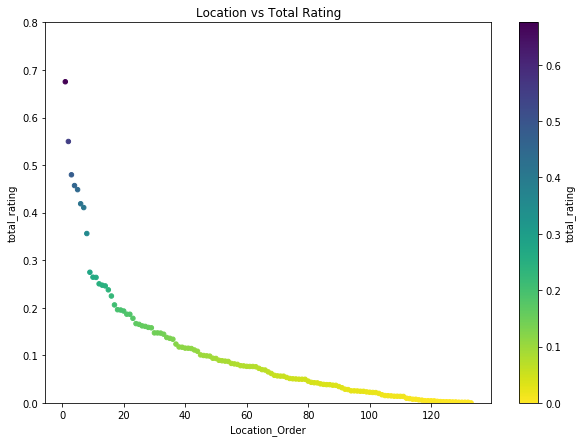

In [40]:
#Total Rating with Location Order
fig, ax = plt.subplots()
Location_rating.plot(kind = "scatter", x = 'Location_order', y ='total_rating', c = 'total_rating', cmap = 'viridis_r', ax=ax)
plt.gcf().set_size_inches((10, 7))  
plt.title("Location vs Total Rating")
plt.xlabel("Location_Order")
plt.ylim(0,0.8)

In [41]:
sns.displot(Location_rating, x = "total_rating")
plt.title("Histogram of Location vs. Total Rating")

AttributeError: module 'seaborn' has no attribute 'displot'

## Top 10 Business Unit_Disposal Role

In [43]:
#Import data in Top 10 Disposals
data_key = 'table.location_disposals_rating_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
Disposal_role = pd.read_csv(data_path, low_memory = False)
Disposal_role.columns.values[0] = "location_order"
count = 1
for i in range(len(Disposal_role)):
  Disposal_role['location_order'][i] = count
  count = count + 1

Disposal_role

,location_order,location,disposals_rating,scan_type_%,ret_date_%,disp_doc_%,err_cost_disposals_%,role
0,1,LOCATION 141,0.579829,1.182614,5.478864,0.000000,7.267088,Disposals
1,2,LOCATION 120,0.436837,0.176244,1.346203,0.000000,1.354732,Disposals
2,3,LOCATION 27,0.429295,0.945181,0.824968,0.002150,1.699408,Disposals
3,4,LOCATION 131,0.397139,0.091812,2.877748,0.078972,2.824332,Disposals
4,5,LOCATION 637,0.388949,0.055774,0.848744,0.078972,1.008706,Disposals
5,6,LOCATION 101,0.381283,0.300635,1.360217,0.877210,1.462682,Disposals
6,7,LOCATION 100,0.217768,1.174970,2.265682,0.012868,2.661610,Disposals
7,8,LOCATION 30,0.210337,0.313043,0.738406,0.077536,0.847791,Disposals
8,9,LOCATION 124,0.209130,0.270811,1.104320,0.000000,1.431355,Disposals
9,10,LOCATION 66,0.181764,0.115464,0.686620,0.000000,0.705501,Disposals


Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Disposals Rating')

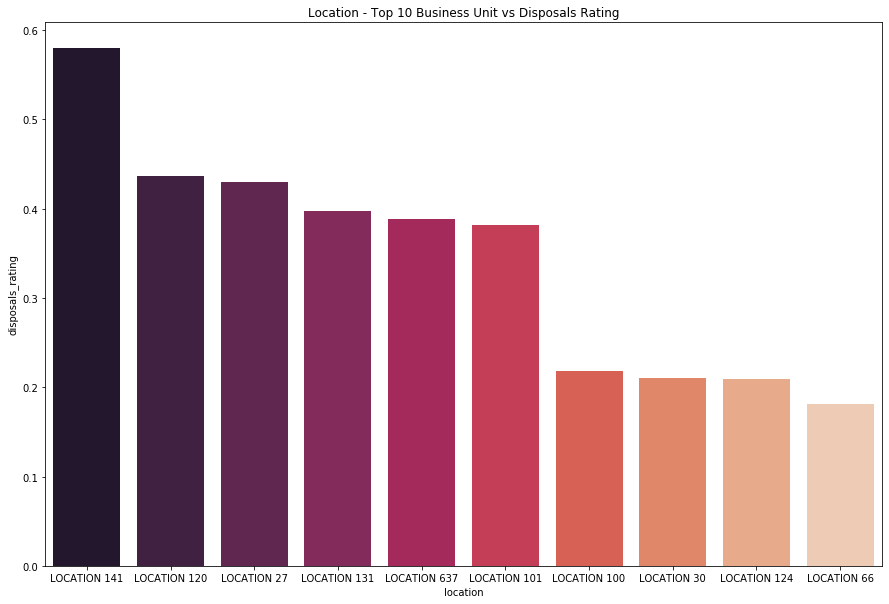

In [44]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="disposals_rating", data= Disposal_role , palette="rocket")
plt.title("Location - Top 10 Business Unit vs Disposals Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Scan Type Rating')

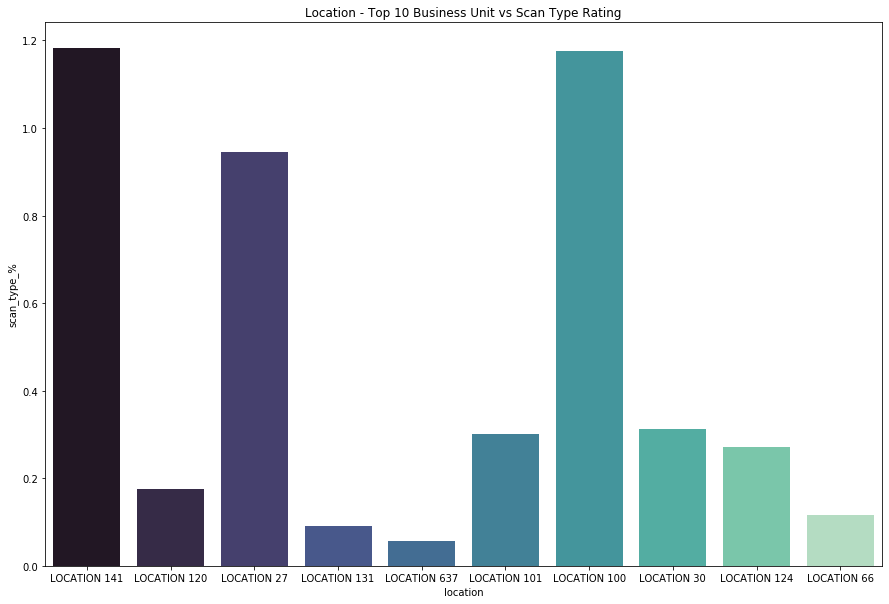

In [45]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="scan_type_%", data= Disposal_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Scan Type Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Retriment Date Rating')

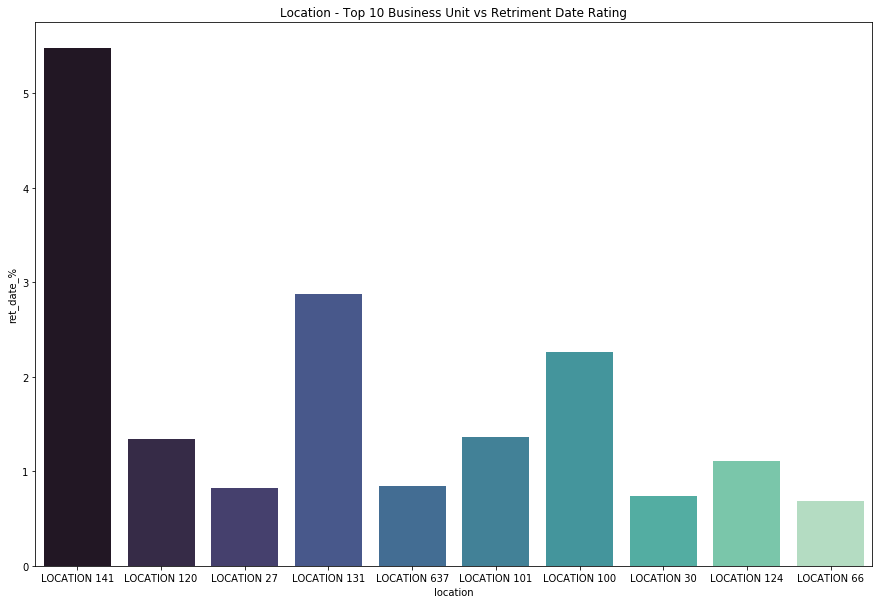

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="ret_date_%", data= Disposal_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Retriment Date Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Disposal Doc Rating')

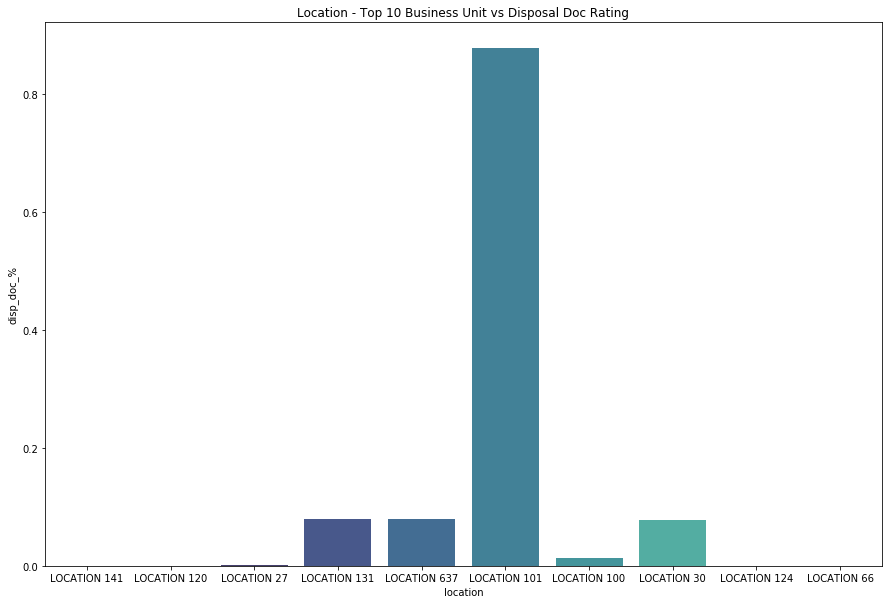

In [47]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="disp_doc_%", data= Disposal_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Disposal Doc Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Error Cost Rating')

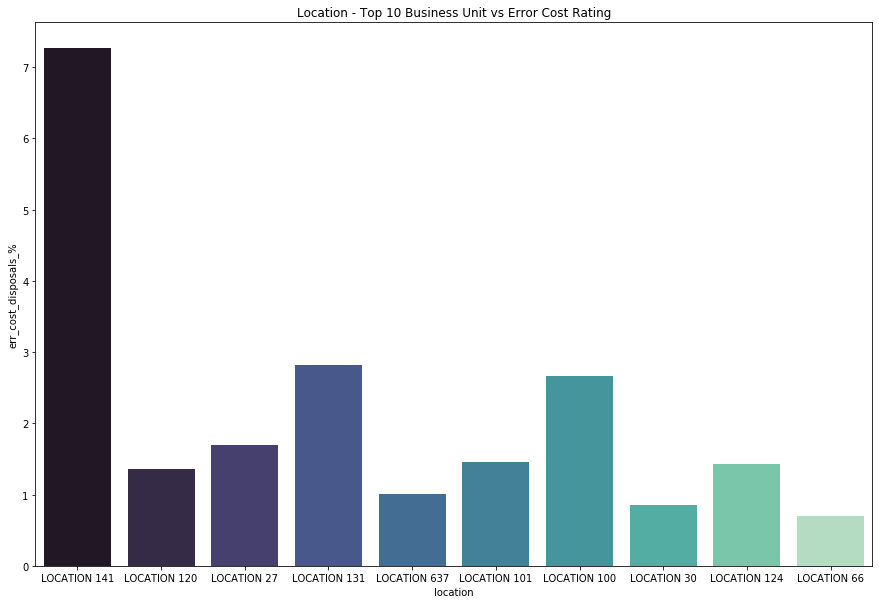

In [48]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="err_cost_disposals_%", data= Disposal_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Error Cost Rating")

## Top 10 Business Unit_Location Role

In [52]:
data_key = 'table.location_location_rating_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
location_role = pd.read_csv(data_path, low_memory = False)
location_role.columns.values[0] = "location_order"
count = 1
for i in range(len(location_role)):
  location_role['location_order'][i] = count
  count = count + 1

location_role

,location_order,location,location_rating,val_ds584_flag_%,err_cost_locations_%,role
0,1,LOCATION 66,0.236908,4.135721,4.161332,Locations
1,2,LOCATION 82,0.195850,3.690350,3.684310,Locations
2,3,LOCATION 105,0.195007,4.333675,4.539379,Locations
3,4,LOCATION 194,0.166038,4.658064,4.626810,Locations
4,5,LOCATION 71,0.138854,0.354742,0.345190,Locations
5,6,LOCATION 101,0.134616,8.291312,8.843908,Locations
6,7,LOCATION 39,0.122111,1.798806,1.441300,Locations
7,8,LOCATION 55,0.112324,1.441474,1.221211,Locations
8,9,LOCATION 23,0.109900,1.894628,1.908493,Locations
9,10,LOCATION 166,0.107270,1.490852,1.411954,Locations


Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Location Rating')

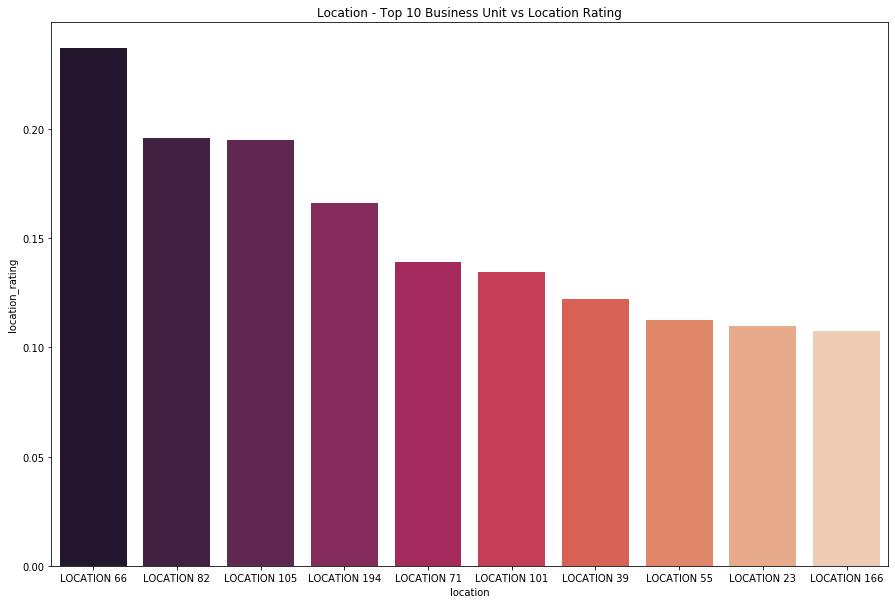

In [53]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="location_rating", data= location_role , palette="rocket")
plt.title("Location - Top 10 Business Unit vs Location Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs VAL_DS584 Rating')

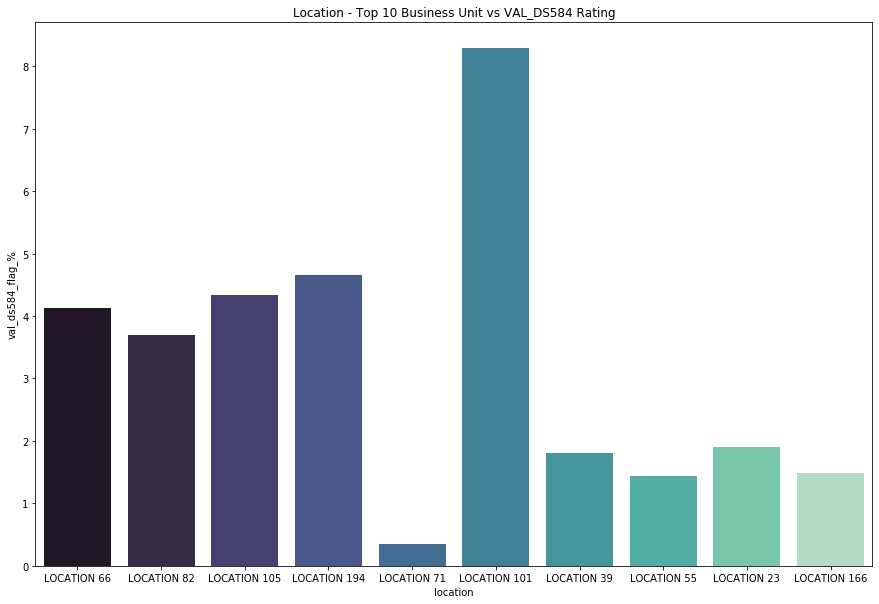

In [54]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="val_ds584_flag_%", data= location_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs VAL_DS584 Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Error Cost')

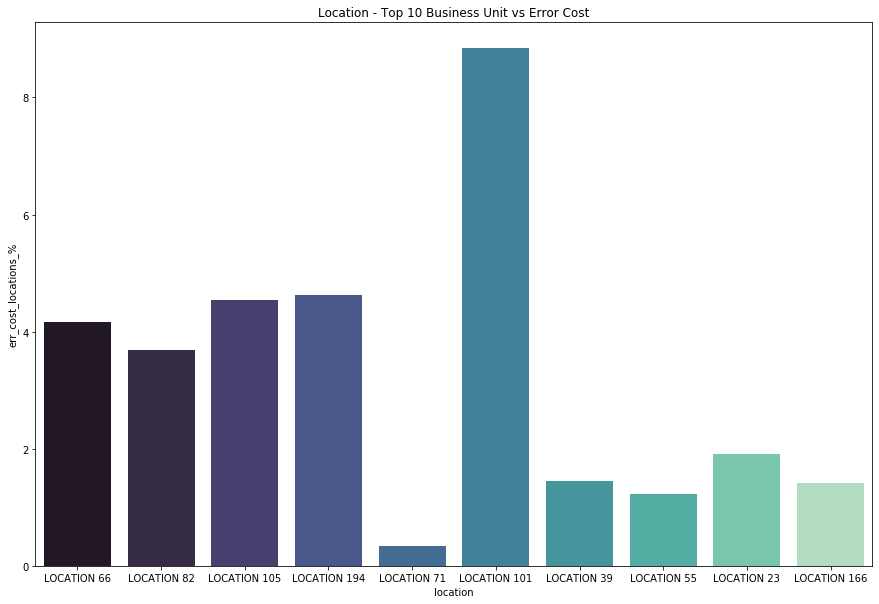

In [55]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="err_cost_locations_%", data= location_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Error Cost")

## Top 10 Business Unit_Receiving Role

In [58]:
data_key = 'table.location_receiving_rating_top_10.0401.csv'
data_path = 's3://{}/{}'.format(bucket, data_key)

# read csv file
receiving_role = pd.read_csv(data_path, low_memory = False)
receiving_role.columns.values[0] = "location_order"
count = 1
for i in range(len(receiving_role)):
  receiving_role['location_order'][i] = count
  count = count + 1

receiving_role

,location_order,location,receiving_rating,misclf_fap_%,cre_mthod_%,err_cost_receiving_%,role
0,1,LOCATION 107,0.274651,0.000000,2.000000,2.000000,Receiving
1,2,LOCATION 209,0.042244,1.009714,0.000000,0.866786,Receiving
2,3,LOCATION 162,0.039612,0.335580,0.049865,0.503426,Receiving
3,4,LOCATION 101,0.033686,0.020737,0.362174,0.131673,Receiving
4,5,LOCATION 628,0.033686,0.020737,0.362174,0.131673,Receiving
5,6,LOCATION 100,0.031499,0.035968,1.764352,1.359903,Receiving
6,7,LOCATION 113,0.030872,0.267626,0.838889,0.952169,Receiving
7,8,LOCATION 2,0.028355,0.727163,0.405941,1.501604,Receiving
8,9,LOCATION 137,0.027810,0.710467,0.000000,0.746622,Receiving
9,10,LOCATION 11,0.025660,1.073986,0.079137,1.011622,Receiving


Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Receiving Rating')

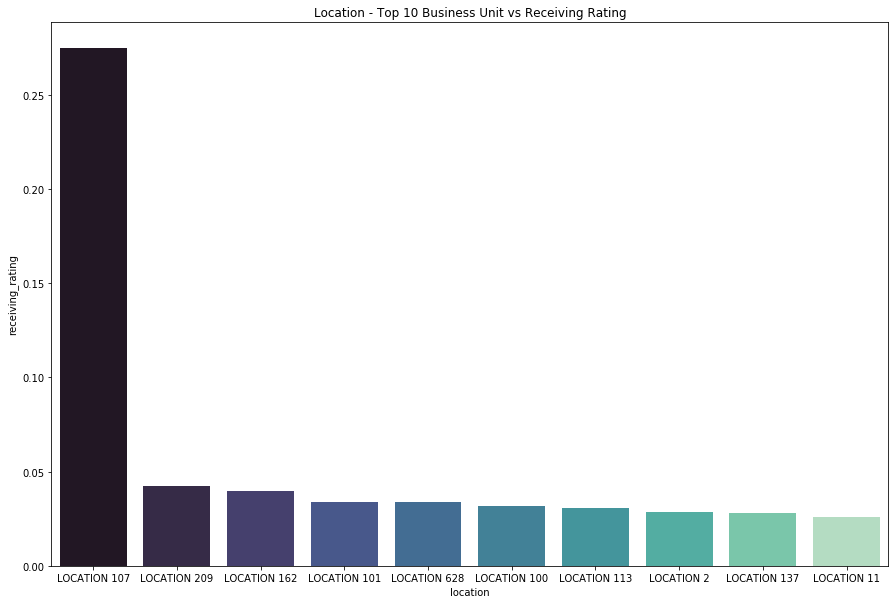

In [59]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="receiving_rating", data= receiving_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Receiving Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Missclassification Rating')

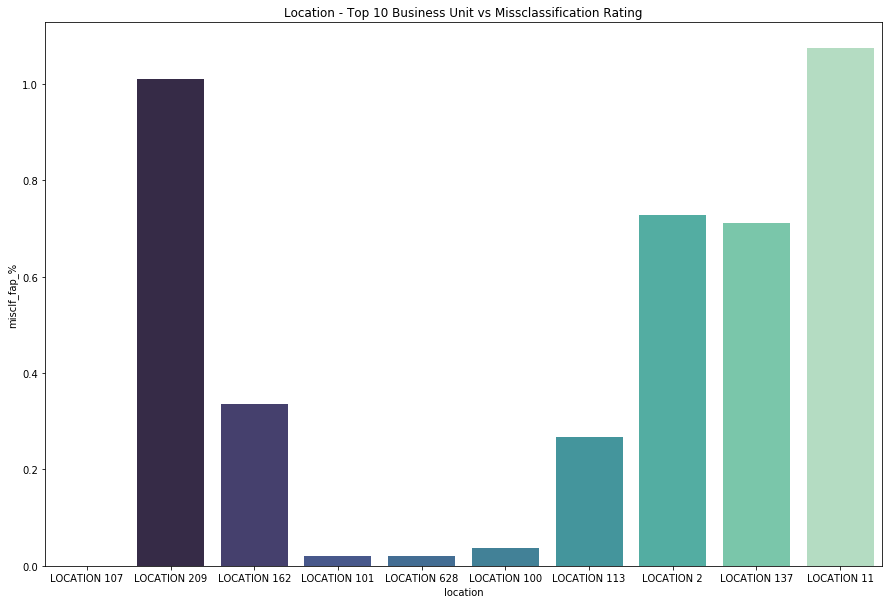

In [60]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="misclf_fap_%", data= receiving_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Missclassification Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Creation Method Rating')

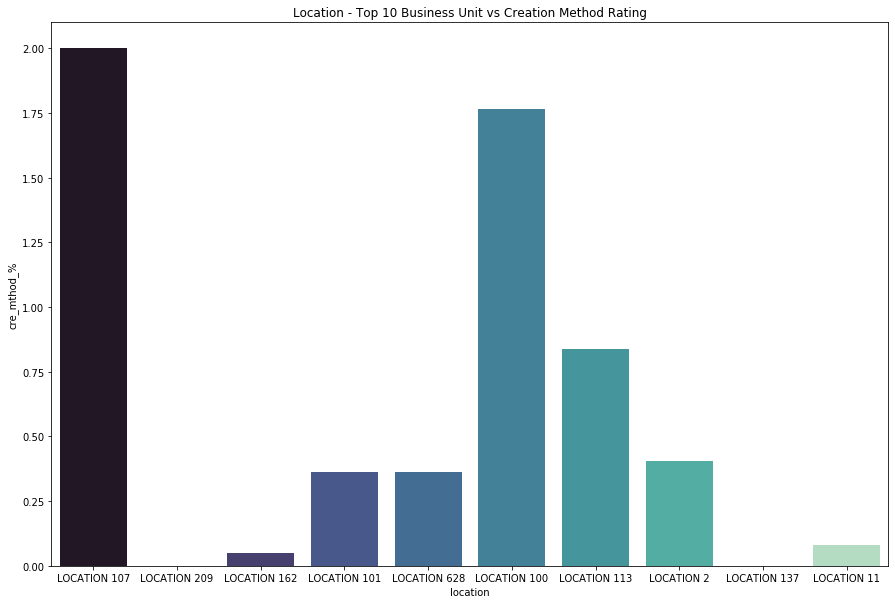

In [61]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="cre_mthod_%", data= receiving_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Creation Method Rating")

Text(0.5, 1.0, 'Location - Top 10 Business Unit vs Error Cost Rating')

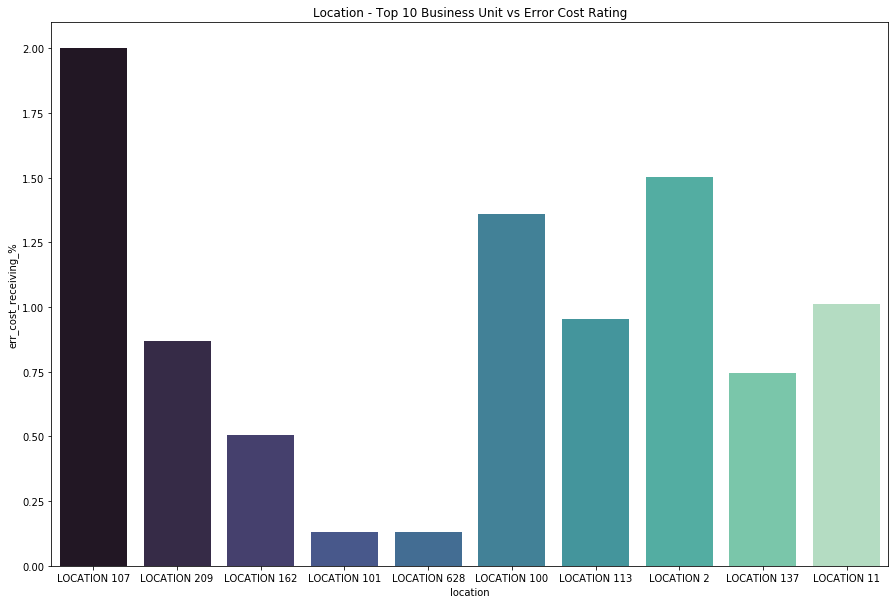

In [62]:
plt.figure(figsize=(15, 10))
sns.barplot(x="location", y="err_cost_receiving_%", data= receiving_role , palette="mako")
plt.title("Location - Top 10 Business Unit vs Error Cost Rating")